### Task 5:

# Introduction: Personal Loan Acceptance Prediction 

## Problem Statement: Predict which customers are likely to accept a personal loan offer. 

### Objective 1: Load and Explore the Dataset

In [1]:
#Import Library
import pandas as pd

In [2]:
# Load Dataset
df=pd.read_csv("C:/Users/luqma/Downloads/archive/bank.csv")

In [3]:
#Dataset Structure
print("Shape:", df.shape)

Shape: (11162, 17)


In [4]:
#Column Names
print("Columns:", df.columns.tolist())

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Objective 2: Data Cleaning and Preparation

In [8]:
#Check Missing Values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [9]:
if df.isnull().sum().sum() == 0:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values found. Consider filling or dropping them.")

✅ No missing values found in the dataset.


### Objective 3: Explore Categorical Features

In [10]:
# Value counts for 'job'
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [11]:
# Value counts for 'marital'
df['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [15]:
# Value counts for 'age'
df['age'].value_counts()

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
88      2
93      2
95      1
89      1
Name: count, Length: 76, dtype: int64

In [14]:
# Value counts for target variable 'y'
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

### Objective 4: Encode Target Variable

In [16]:
# Before encoding
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [17]:
#Import scikit-learn tool
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
df['deposit'] = le.fit_transform(df['deposit']) 

In [18]:
# After encoding
df['deposit'].value_counts() # yes=1, no=0

deposit
0    5873
1    5289
Name: count, dtype: int64

### Objective 5: One-Hot Encoding Categorical Features

In [19]:
# Shape before encoding
df.shape

(11162, 17)

In [20]:
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [21]:
# Shape after encoding
df_encoded.shape

(11162, 43)

### Objective 6: Define Features and Target

In [22]:
# Split features and target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

In [23]:
# View shape
X.shape, y.shape

((11162, 42), (11162,))

### Objective 7: Train-Test Split

In [24]:
#Import scikit-learn tool
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Objective 8: Logistic Regression (Model Training)

In [27]:
#Import scikit-learn tool
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [28]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

print("✅ Logistic Regression model trained successfully after scaling.")

✅ Logistic Regression model trained successfully after scaling.


### Objective 9: Logistic Regression(Prediction)

In [31]:
# Predict (using scaled test set)
y_pred_log = log_model.predict(X_test_scaled)

In [32]:
# Show predictions
print("🔍 Predictions on Test Set:")
print(y_pred_log)

🔍 Predictions on Test Set:
[0 1 1 ... 0 1 1]


In [33]:
# Show first 10 predictions alongside actual values
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred_log[:10]})
print("\n📊 Actual vs Predicted (First 10):")
print(comparison)


📊 Actual vs Predicted (First 10):
   Actual  Predicted
0       0          0
1       1          1
2       1          1
3       1          1
4       0          0
5       0          1
6       0          0
7       0          0
8       0          0
9       0          1


### Objective 10: Decision Tree Classifier (Model Training)

In [45]:
#Import scikit-learn tool
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [47]:
# Initialize and train model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

In [50]:
# Fit model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [51]:
# Best model
best_tree = grid_search.best_estimator_

### Objective 11: Decision Tree Classifier (Prediction)

In [52]:
# Predict with best model
y_pred_best = best_tree.predict(X_test)

In [53]:
# Show predictions
print("🌳 Predictions by Decision Tree on Test Set:")
print(y_pred_tree)

🌳 Predictions by Decision Tree on Test Set:
[1 1 1 ... 0 1 1]


In [54]:
# Compare actual vs predicted (first 10 values)
comparison_tree = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_tree[:10]
})
print("\n📊 Actual vs Predicted by Decision Tree (First 10):")
print(comparison_tree)


📊 Actual vs Predicted by Decision Tree (First 10):
   Actual  Predicted
0       0          1
1       1          1
2       1          1
3       1          1
4       0          0
5       0          0
6       0          1
7       0          0
8       0          0
9       0          0


### Objective 12: Evaluate Models (Accuracy)

In [55]:
#Import scikit-learn tool
from sklearn.metrics import accuracy_score

In [56]:
# Accuracy Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best))

Logistic Regression Accuracy: 0.8083296014330497
Decision Tree Accuracy: 0.8168383340797134


### Objective 13: Evaluate Models (Confusion Matrix)

In [41]:
# Import Tool and Library
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

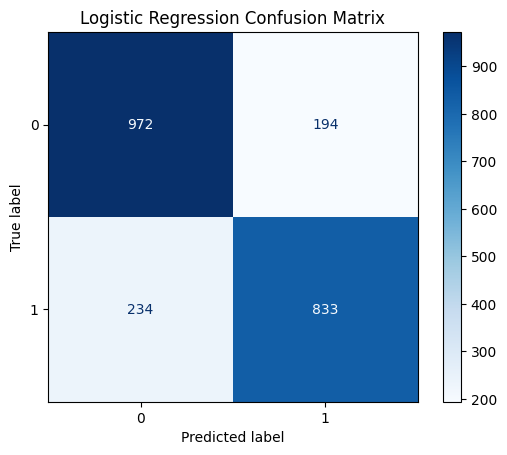

In [42]:
# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.grid(False)
plt.show()

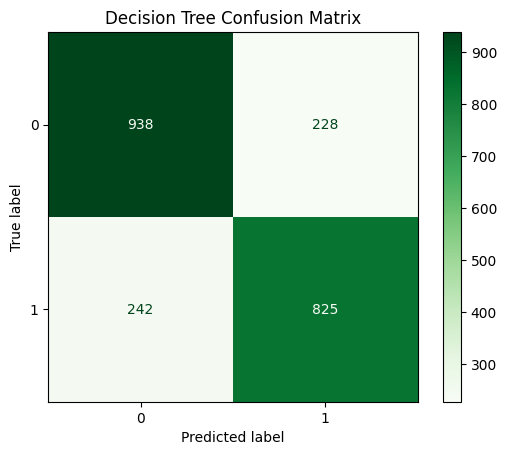

In [43]:
# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.grid(False)
plt.show()

### Objective 14: Exploratory Data Analysis (EDA)

#### Check deposit rates by different Groups

##### 1) **By Age**

In [57]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Create age bins to group customers
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], 
                         labels=['18-30', '31-40', '41-50', '51-60', '60+'])

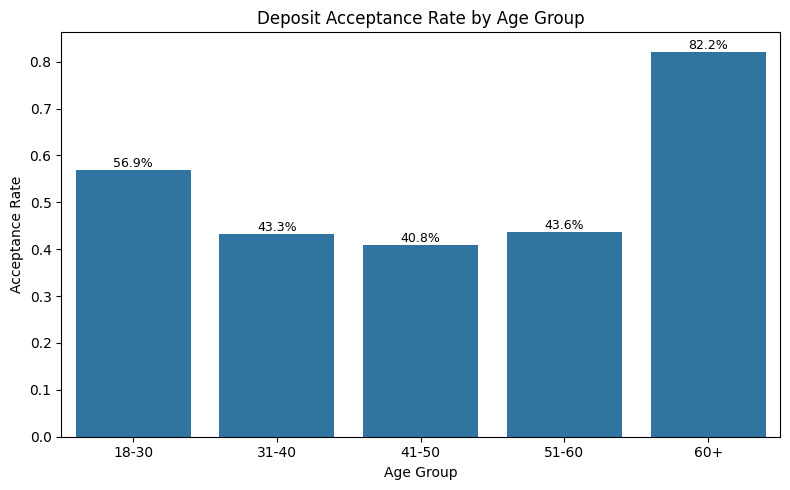

In [72]:
# Plot deposit rate by age group
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='age_group', 
    y='deposit', 
    data=df, 
    estimator=lambda x: sum(x==1)/len(x), 
    errorbar=None
)

# Add percentage labels to each bar
for p in ax.patches:
    percentage = f'{p.get_height()*100:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title("Deposit Acceptance Rate by Age Group")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

##### 2) **By Job**

In [60]:
deposit_by_job = df.groupby('job')['deposit'].mean().sort_values(ascending=False)
print(deposit_by_job)

job
student          0.747222
retired          0.663239
unemployed       0.565826
management       0.507015
unknown          0.485714
admin.           0.473013
self-employed    0.461728
technician       0.460779
services         0.399783
housemaid        0.397810
entrepreneur     0.375000
blue-collar      0.364198
Name: deposit, dtype: float64


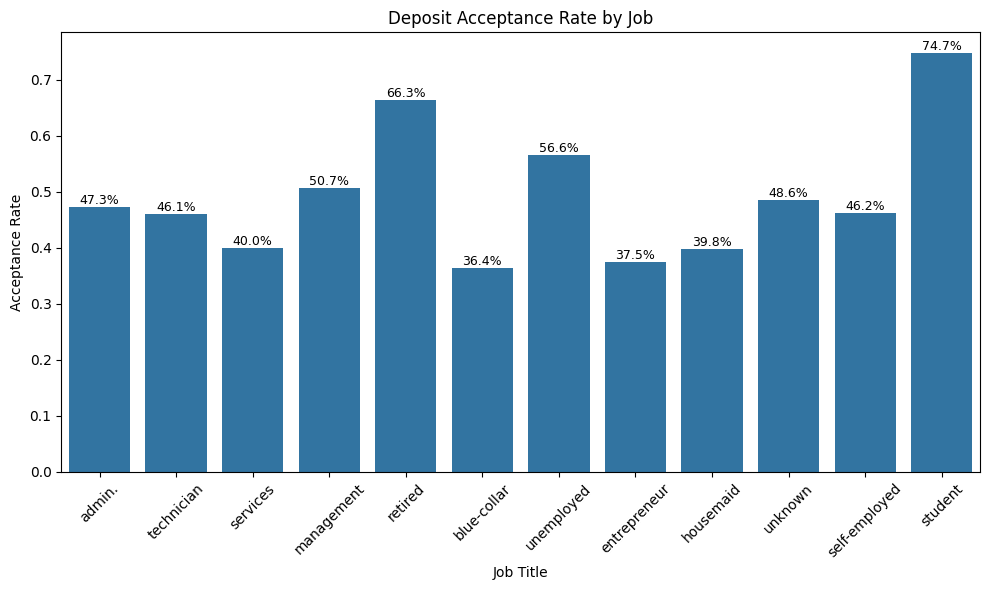

In [70]:
# Barplot of deposit acceptance rate by job
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='job', 
    y='deposit', 
    data=df, 
    estimator=lambda x: sum(x==1)/len(x), 
    errorbar=None
)

# Add percentage labels on bars
for p in ax.patches:
    percentage = f'{p.get_height()*100:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.title("Deposit Acceptance Rate by Job")
plt.ylabel("Acceptance Rate")
plt.xlabel("Job Title")
plt.tight_layout()
plt.show()

##### 3) **By Marital Status**

In [62]:
deposit_by_marital = df.groupby('marital')['deposit'].mean()
print(deposit_by_marital)

marital
divorced    0.481052
married     0.433790
single      0.543491
Name: deposit, dtype: float64


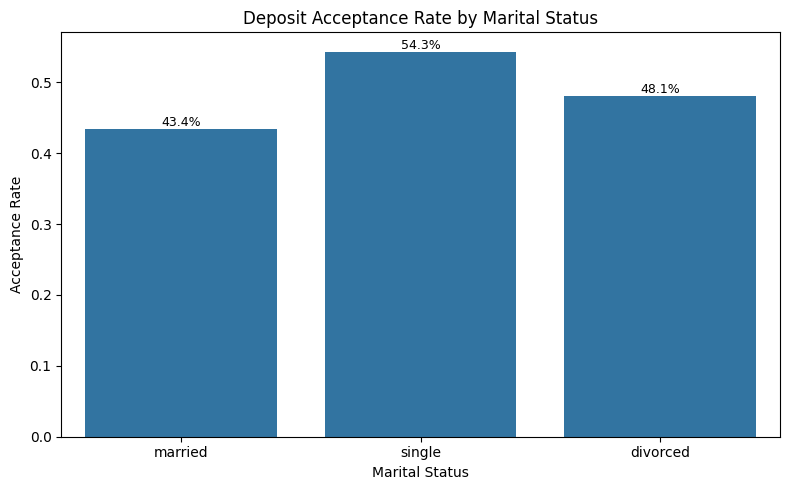

In [71]:
# Barplot of deposit acceptance rate by marital status
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='marital', 
    y='deposit', 
    data=df, 
    estimator=lambda x: sum(x==1)/len(x), 
    errorbar=None
)

# Add percentage labels
for p in ax.patches:
    percentage = f'{p.get_height()*100:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.title("Deposit Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xlabel("Marital Status")
plt.tight_layout()
plt.show()

## Conclusion

- The objective of this task was to predict which customers are likely to accept a personal loan offer using the Bank Marketing Dataset.

- After basic data exploration, key features such as **age**, **job**, and **marital status** were analyzed to understand customer behavior.

- The target variable `deposit` was label-encoded into a binary format:  
  `1` → Accepted the offer  
  `0` → Did not accept the offer

- A **Logistic Regression** model was trained. The model's performance metrics showed that it was reasonably effective at predicting customer behavior.

- Analysis of different features showed:
  - **Older customers**, especially those  **60+ years**, were more likely to accept personal loan offers.
  - Certain job roles such as **students, retirees, and Unemployed** were more receptive to the offers.
  - **Single customers** had a slightly higher tendency to accept compared to **married** or **divorced** individuals.

- Visualizations using bar plots clearly demonstrated trends across **job types**, **marital status**, and **age groups**, supporting the prediction results.

- These insights can help financial institutions **identify potential customers** more effectively and **optimize marketing strategies** accordingly.

- For further improvement, more complex models like **Random Forest**, or **Gradient Boosting** can be tested. Additionally, **feature engineering** and **handling of class imbalance** may enhance prediction accuracy.
